ابتدا داده ها را خوانده و با مشاهده 5 سطر اول آن به درکی از محتوای داده میرسیم

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ns

In [2]:
data = pd.read_csv('Q1_data.csv')
data.head(5)

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10


سپس داده ها را با محورهای مذکور رسم کرده و هر کوین را با یک رنگ متفاوت نمایش میدهیم

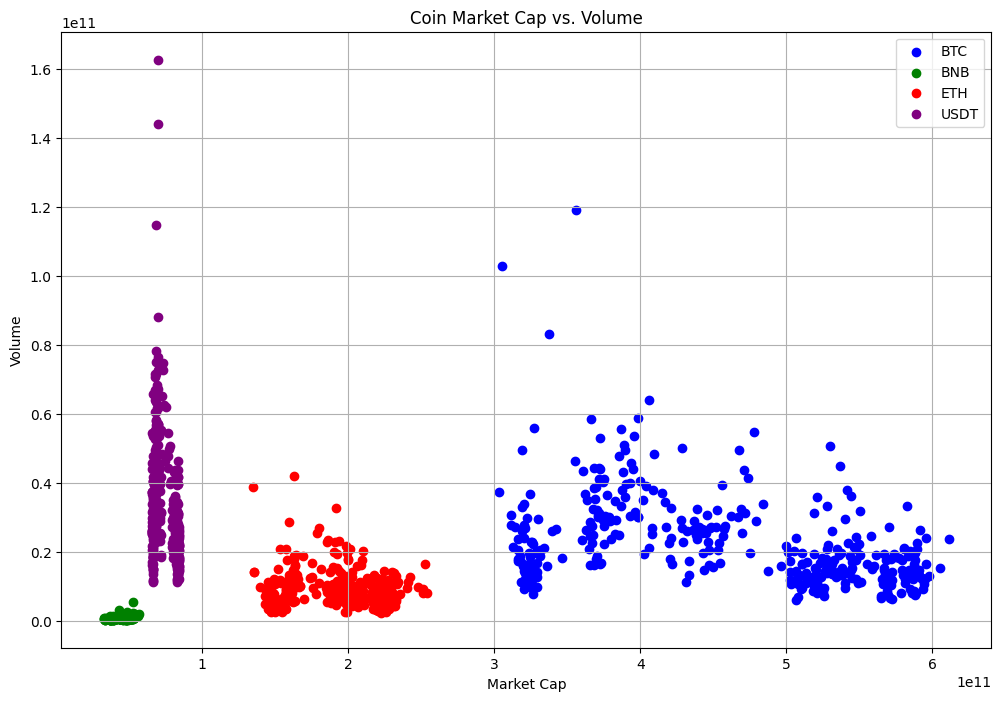

In [3]:
# Define colors for each coin
colors = {'BTC': 'blue', 'BNB': 'green', 'ETH': 'red', 'USDT': 'purple'}

# Create a scatter plot
plt.figure(figsize=(12, 8))
for coin in colors:
    subset = data[data['symbol'] == coin]
    plt.scatter(subset['market_cap'], subset['volume'], label=coin, color=colors[coin])

# Customize the plot
plt.title('Coin Market Cap vs. Volume')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

بخش اول

ابتدا دو ستون مورد نظر را به صورت جداگانه ذخیره میکنیم و پس از مدلسازی، خروجی نهایی مدل را به صورت یک ستون به آن اضافه میکنیم

In [4]:
from sklearn.cluster import KMeans

# select the main features
features = data[['market_cap','volume']]

# perform k-means clustering
model_kmeans = KMeans(n_clusters=5, random_state=42)
features['cluster'] = model_kmeans.fit_predict(features)
#the cluster ids will be 0, 1, 2, 3, 4 for 5 clusters

cluster_centroids = model_kmeans.cluster_centers_
print('the cluster centroids will be in \n', cluster_centroids)

the cluster centroids will be in 
 [[7.47526885e+10 3.31651327e+10]
 [5.44479225e+11 1.71794734e+10]
 [1.96251675e+11 8.76098756e+09]
 [3.74621528e+11 2.86925418e+10]
 [4.45996615e+10 6.80796582e+08]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2869819028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


حال نمودار داده ها را به ازای هر خوشه با یک رنگ مجزا به همراه مرکز خوشه نمایش میدهیم

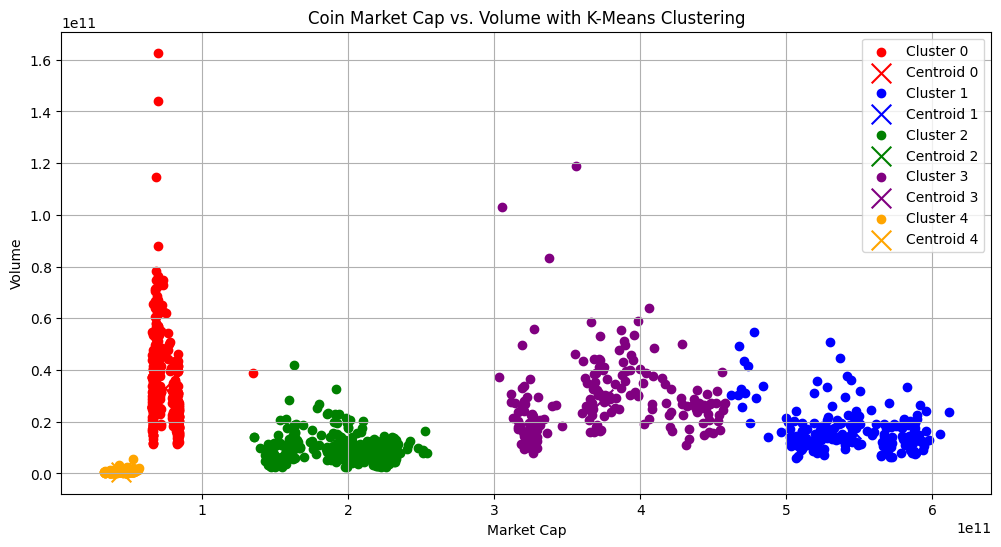

In [5]:
# Define cluster colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}

# Create a scatter plot with cluster centroids
plt.figure(figsize=(12, 6))
for cluster_id, color in cluster_colors.items():
    cluster_data = features[features['cluster'] == cluster_id]
    plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster_id}', c=color)
    plt.scatter(cluster_centroids[cluster_id, 0], cluster_centroids[cluster_id, 1], marker='x', c=color, s=200, label=f'Centroid {cluster_id}')

# Customize the plot
plt.title('Coin Market Cap vs. Volume with K-Means Clustering')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

حال مدلسازی را به ازای مقادیر کا از 1 تا 10 انجام میدهیم

c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


the cluster centroids  for k = 1 will be in 
 [[1.93588493e+11 1.64103995e+10 2.00000000e+00]]


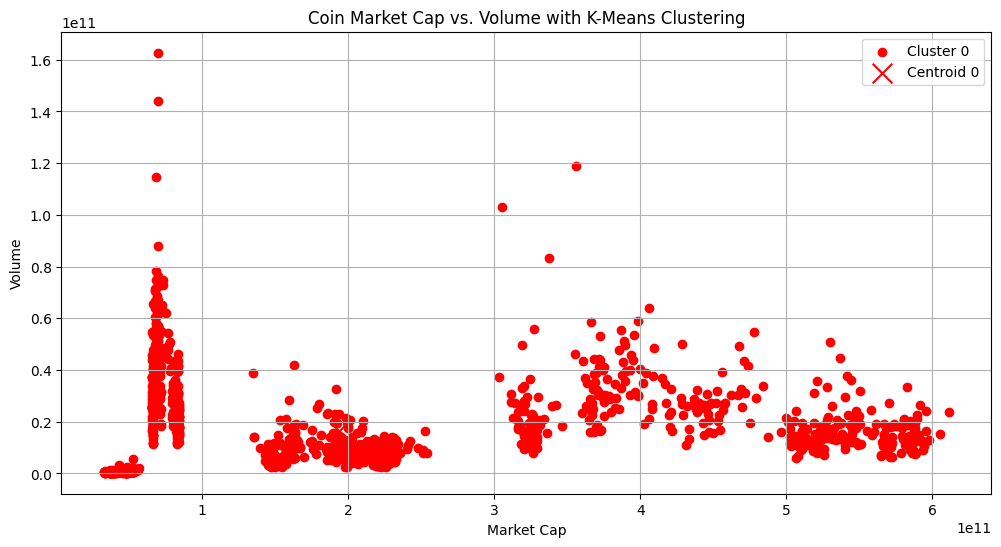

the cluster centroids  for k = 2 will be in 
 [[1.05090079e+11 1.42246537e+10 0.00000000e+00]
 [4.59083735e+11 2.29676369e+10 0.00000000e+00]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

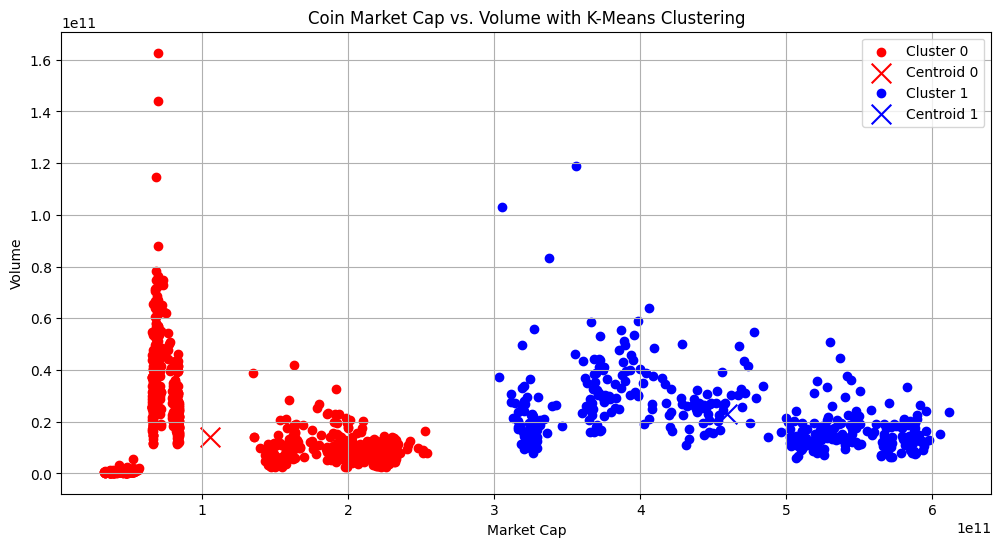

the cluster centroids  for k = 3 will be in 
 [[5.99046169e+10 1.69374058e+10 0.00000000e+00]
 [4.87966331e+11 2.29669123e+10 1.00000000e+00]
 [2.15728639e+11 1.08758222e+10 1.50588235e-01]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

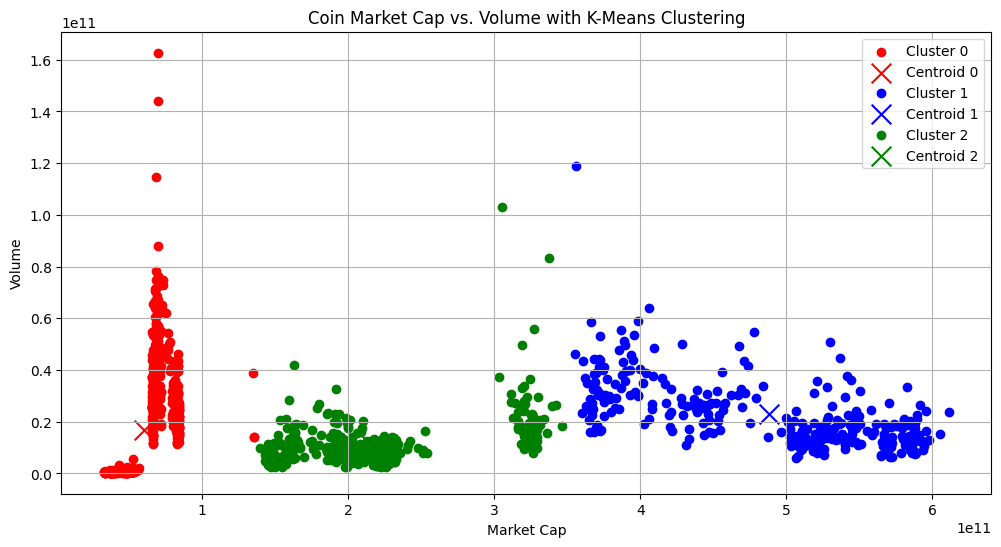

c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


the cluster centroids  for k = 4 will be in 
 [[ 5.95939232e+10  1.69151359e+10 -1.77635684e-15]
 [ 5.44479225e+11  1.71794734e+10  1.00000000e+00]
 [ 1.96082390e+11  8.84368950e+09  1.98351648e+00]
 [ 3.74621528e+11  2.86925418e+10  1.34972678e+00]]


<Figure size 640x480 with 0 Axes>

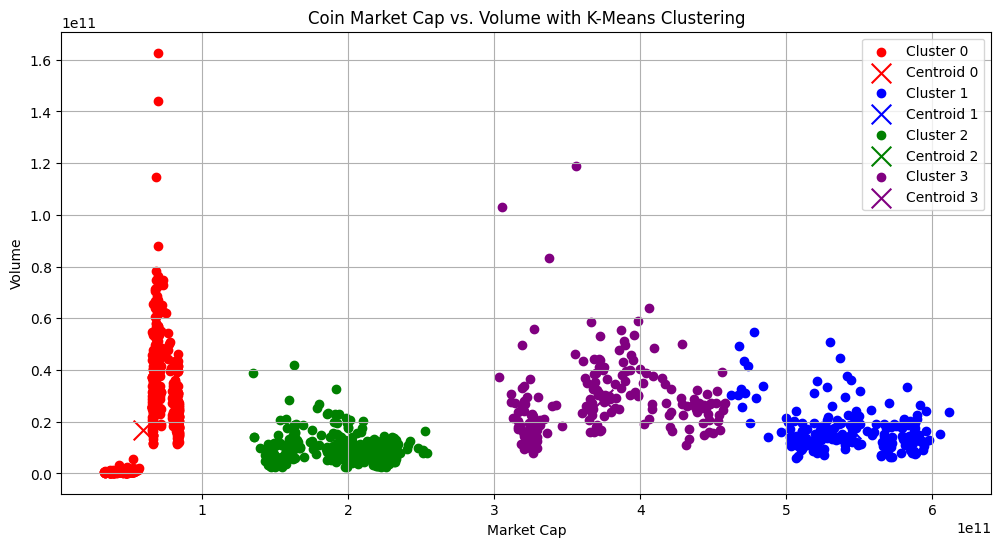

the cluster centroids  for k = 5 will be in 
 [[ 7.47526885e+10  3.31651327e+10  5.47945205e-03]
 [ 5.44479225e+11  1.71794734e+10  1.00000000e+00]
 [ 1.96251675e+11  8.76098756e+09  2.00000000e+00]
 [ 3.74621528e+11  2.86925418e+10  3.00000000e+00]
 [ 4.45996615e+10  6.80796582e+08 -4.44089210e-16]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

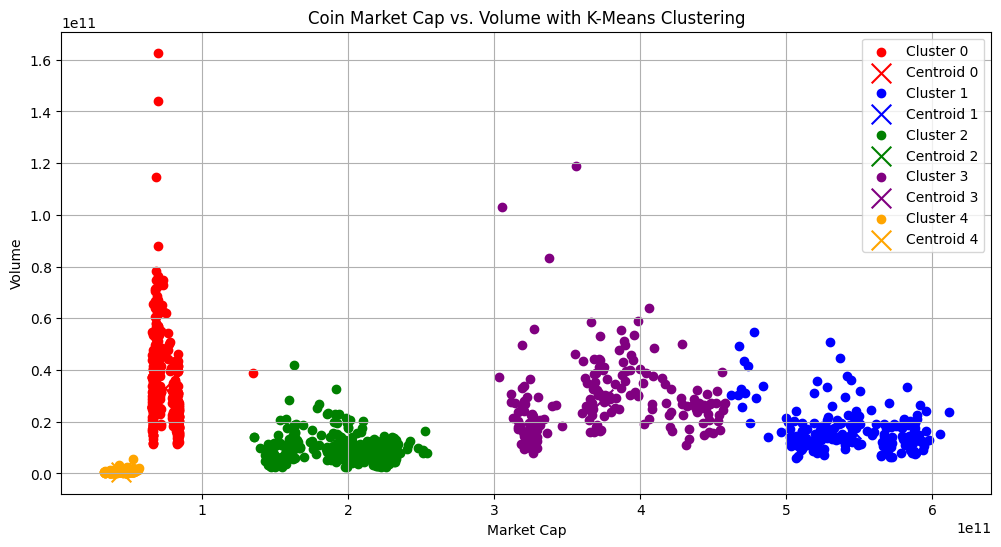

the cluster centroids  for k = 6 will be in 
 [[7.47526885e+10 3.31651327e+10 0.00000000e+00]
 [4.35307111e+11 2.97827642e+10 2.65789474e+00]
 [1.96251675e+11 8.76098756e+09 2.00000000e+00]
 [5.49972402e+11 1.59147058e+10 1.00000000e+00]
 [4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [3.46898128e+11 2.85254930e+10 3.00000000e+00]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

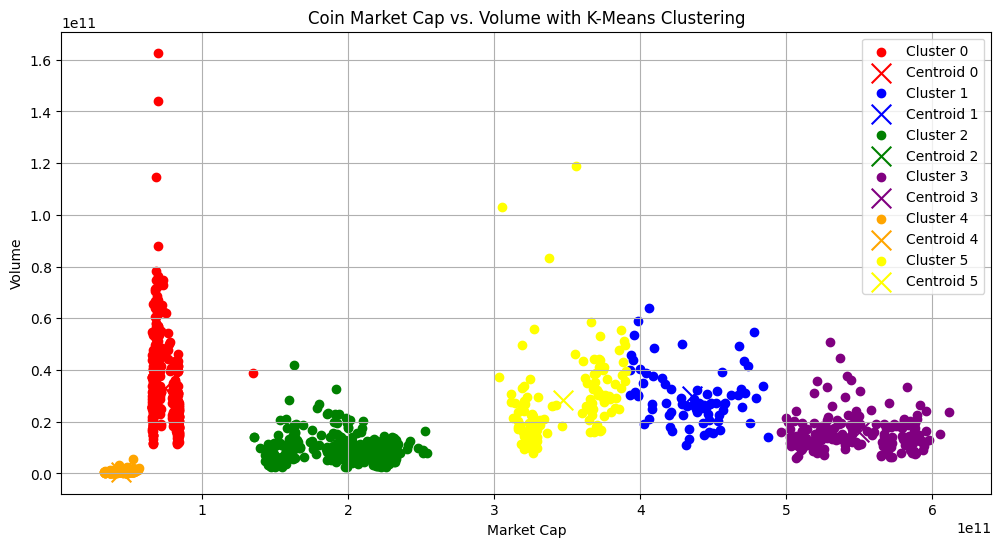

the cluster centroids  for k = 7 will be in 
 [[3.46898128e+11 2.85254930e+10 5.00000000e+00]
 [7.45881848e+10 3.31494752e+10 3.10862447e-15]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [5.49972402e+11 1.59147058e+10 3.00000000e+00]
 [4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [1.58098735e+11 1.00879015e+10 1.98290598e+00]
 [4.35307111e+11 2.97827642e+10 1.00000000e+00]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

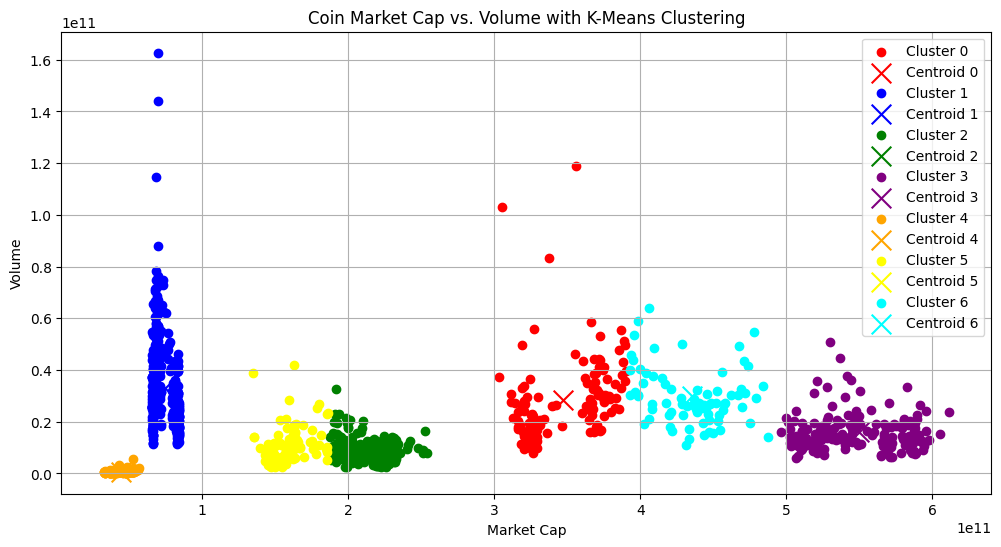

the cluster centroids  for k = 8 will be in 
 [[7.45881848e+10 3.31494752e+10 1.00000000e+00]
 [5.23903381e+11 1.73057222e+10 3.12631579e+00]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [3.43180156e+11 2.73116485e+10 0.00000000e+00]
 [4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [1.58098735e+11 1.00879015e+10 5.00000000e+00]
 [5.78579429e+11 1.46282019e+10 3.00000000e+00]
 [4.27258841e+11 3.15307723e+10 5.26829268e+00]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

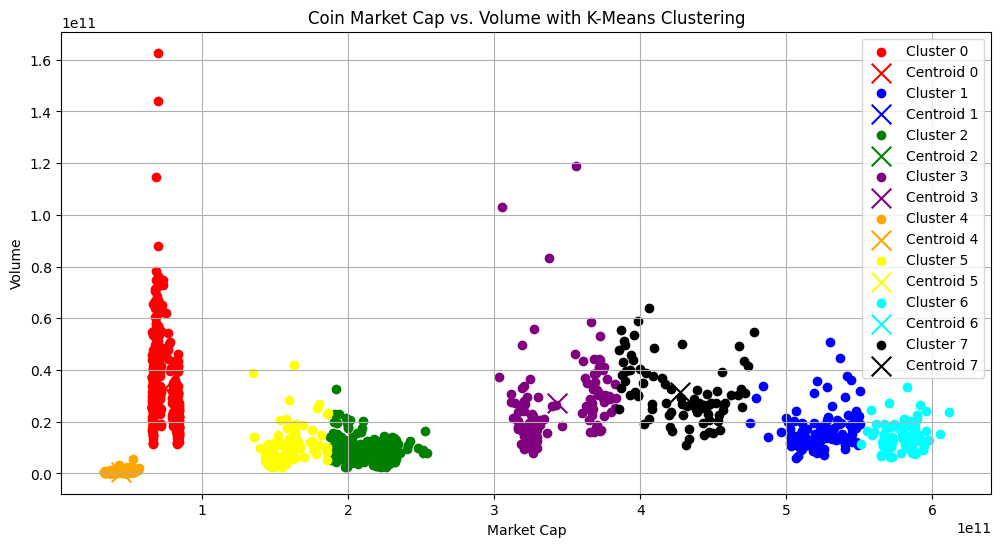

the cluster centroids  for k = 9 will be in 
 [[7.45881848e+10 3.31494752e+10 2.22044605e-15]
 [5.25626960e+11 1.69125387e+10 1.05376344e+00]
 [2.14074648e+11 8.25432592e+09 2.00000000e+00]
 [3.23696565e+11 2.29710334e+10 3.00000000e+00]
 [4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [1.58098735e+11 1.00879015e+10 5.00000000e+00]
 [5.78941220e+11 1.46719762e+10 6.00000000e+00]
 [3.80361797e+11 3.56518880e+10 4.54666667e+00]
 [4.46070079e+11 2.72901035e+10 6.67857143e+00]]


c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


<Figure size 640x480 with 0 Axes>

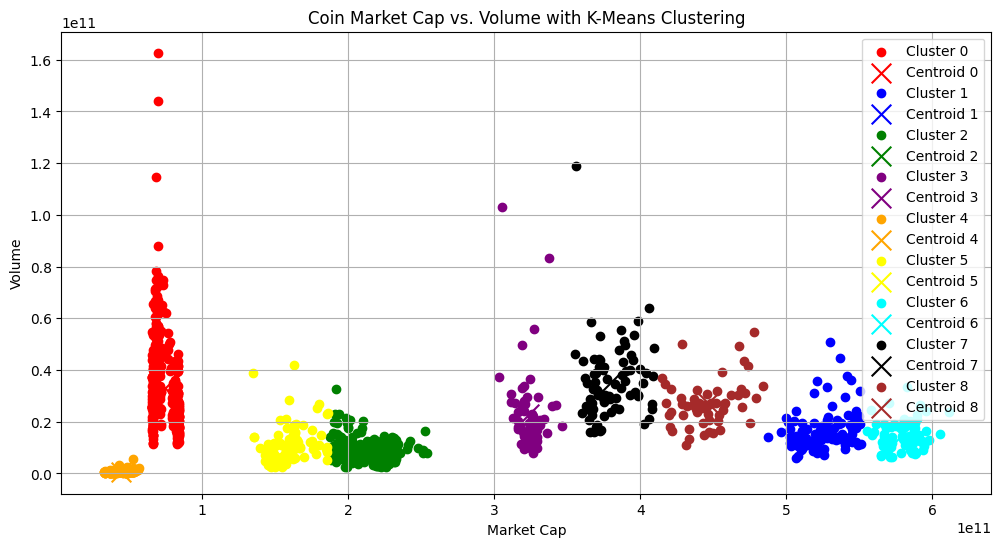

c:\Users\djddd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\djddd\AppData\Local\Temp\ipykernel_13968\2950112251.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = model_kmeans.fit_predict(features)


the cluster centroids  for k = 10 will be in 
 [[7.58399914e+10 2.63196619e+10 1.77635684e-15]
 [5.25626960e+11 1.69125387e+10 1.00000000e+00]
 [2.13620122e+11 8.31133342e+09 2.04780876e+00]
 [4.45996615e+10 6.80796582e+08 4.00000000e+00]
 [3.23696565e+11 2.29710334e+10 3.00000000e+00]
 [4.46070079e+11 2.72901035e+10 8.00000000e+00]
 [1.57126899e+11 1.00261795e+10 5.00000000e+00]
 [3.80361797e+11 3.56518880e+10 7.00000000e+00]
 [5.78941220e+11 1.46719762e+10 6.00000000e+00]
 [6.95981066e+10 6.03751689e+10 0.00000000e+00]]


<Figure size 640x480 with 0 Axes>

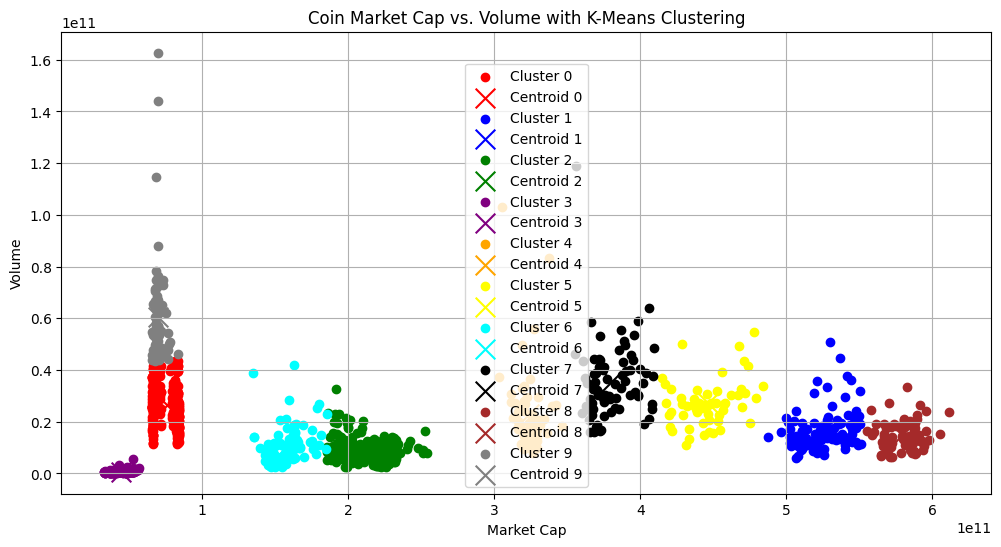

<Figure size 640x480 with 0 Axes>

In [7]:
# Define cluster colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5:'yellow', 6:'cyan', 7:'black', 8:'brown', 9:'gray'}

for K in range(10):
    # perform k-means clustering
    model_kmeans = KMeans(n_clusters=K+1, random_state=42)
    features['cluster'] = model_kmeans.fit_predict(features)
    #the cluster ids will be 0, 1, 2, 3, ... , K for K clusters

    cluster_centroids = model_kmeans.cluster_centers_
    print(f'the cluster centroids  for k = {K+1} will be in \n', cluster_centroids)

    # Create a scatter plot with cluster centroids
    plt.figure(figsize=(12, 6))
    for cluster_id, color in cluster_colors.items():
        if cluster_id > K:
            break
        cluster_data = features[features['cluster'] == cluster_id]
        plt.scatter(cluster_data['market_cap'], cluster_data['volume'], label=f'Cluster {cluster_id}', c=color)
        plt.scatter(cluster_centroids[cluster_id, 0], cluster_centroids[cluster_id, 1], marker='x', c=color, s=200, label=f'Centroid {cluster_id}')

    # Customize the plot
    plt.title('Coin Market Cap vs. Volume with K-Means Clustering')
    plt.xlabel('Market Cap')
    plt.ylabel('Volume')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
    plt.savefig(f'scatter plot for k of {K+1}.png')